# Time Series

- Sequence of Observations recorded at regular time intervals
- Hourly, Daily, Weekly, Monthly, Quartly, Yearly.
- Seconds, Minutes
    - number of clicks (click on an icon or any links)
    - user visiting per minute 
- Analysis
    - Understand the data
    - visualize the data
    - Find any patterns in the data

In [3]:
import pandas as pd # Loading the data
import numpy as np # Numerical Operations
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [6]:
df1 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",parse_dates=['date'],index_col='date')
df1.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# Panel Data - Time based data

- General Time Series data consists of two columns one is Date and another is the predictable column
- Panel Data - Apart from date and predictable column there are other columns which might explain the predictable column.

In [9]:
task_df = pd.read_csv("./datasets/mau_timeseries.csv")
task_df.head()

,month_id,realm_code,mau,new_mau
0,2020-07-01 00:00:00,EU,933707,8163
1,2020-08-01 00:00:00,EU,978980,5071
2,2020-09-01 00:00:00,EU,935004,9131
3,2020-10-01 00:00:00,EU,1004423,5742
4,2020-11-01 00:00:00,EU,1114783,10370


In [15]:
task_df.realm_code.value_counts()

EU     37
SEA    37
Name: realm_code, dtype: int64

# Visualization

#### Learning

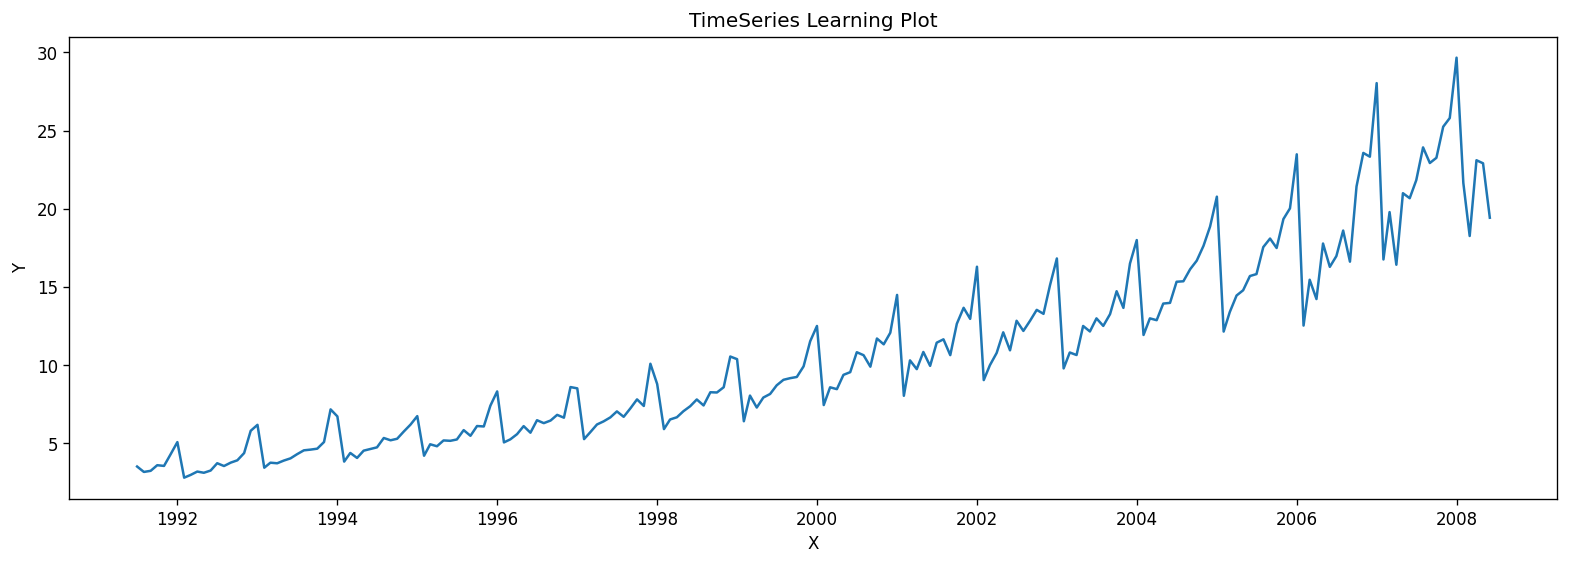

In [11]:
plt.figure(figsize=(16,5),dpi=120)

plt.plot(df1.index,df1.value)
plt.gca().set(title="TimeSeries Learning Plot", xlabel="X",ylabel="Y")
plt.show()

#### Task

- Only for EU data

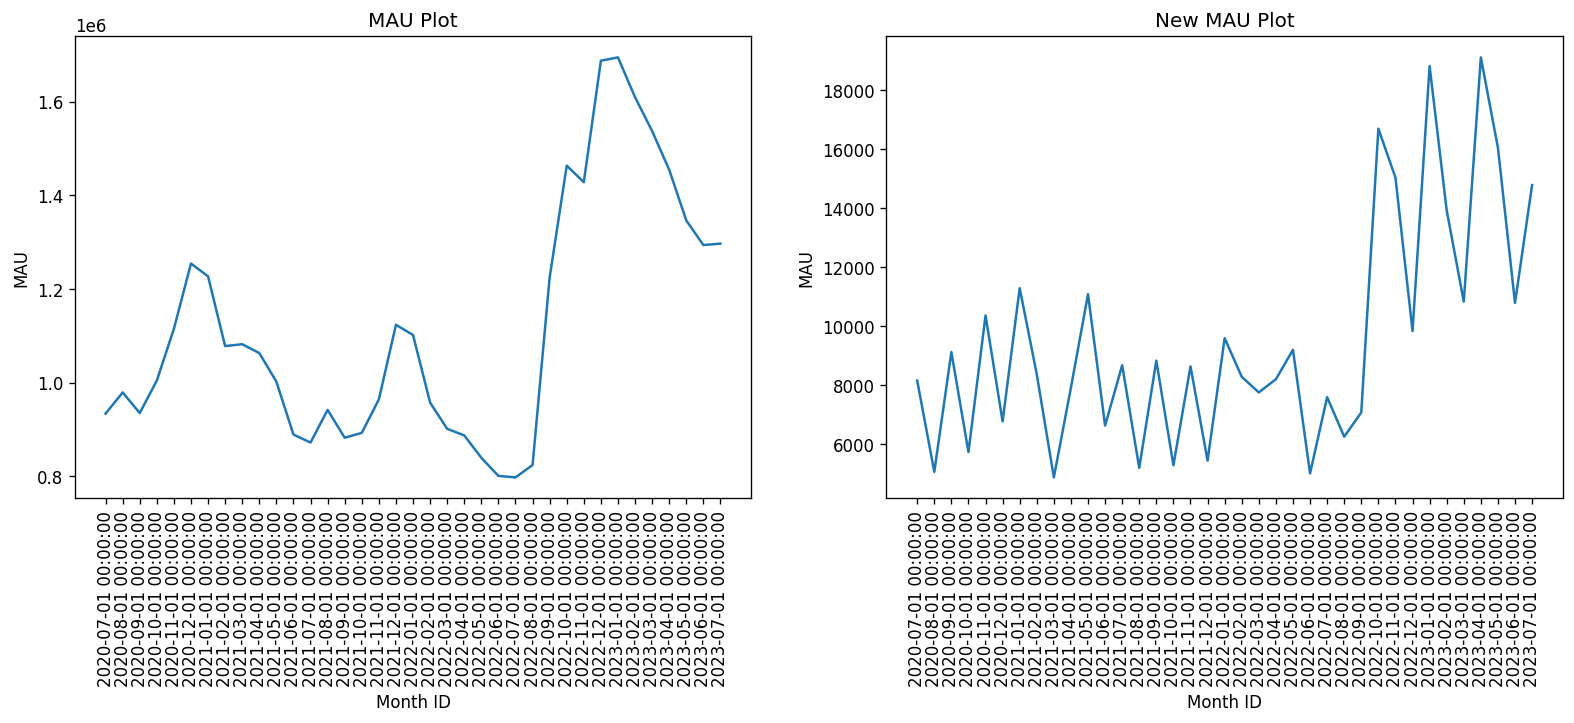

In [23]:
task_df = task_df[task_df["realm_code"]=="EU"]

plt.figure(figsize=(16,5),dpi=120)

plt.subplot(1,2,1)
plt.plot(task_df.month_id,task_df.mau)
plt.gca().set(title="MAU Plot", xlabel="Month ID",ylabel="MAU")
plt.xticks(rotation=90)
# plt.legend(["MAU","newMAU"])


plt.subplot(1,2,2)
plt.plot(task_df.month_id,task_df.new_mau)
plt.gca().set(title="New MAU Plot", xlabel="Month ID",ylabel="MAU")
plt.xticks(rotation=90)

plt.show()

#### Learning

In [44]:
data = pd.read_csv("./datasets/AirPassengers.csv",parse_dates=["date"])
data.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


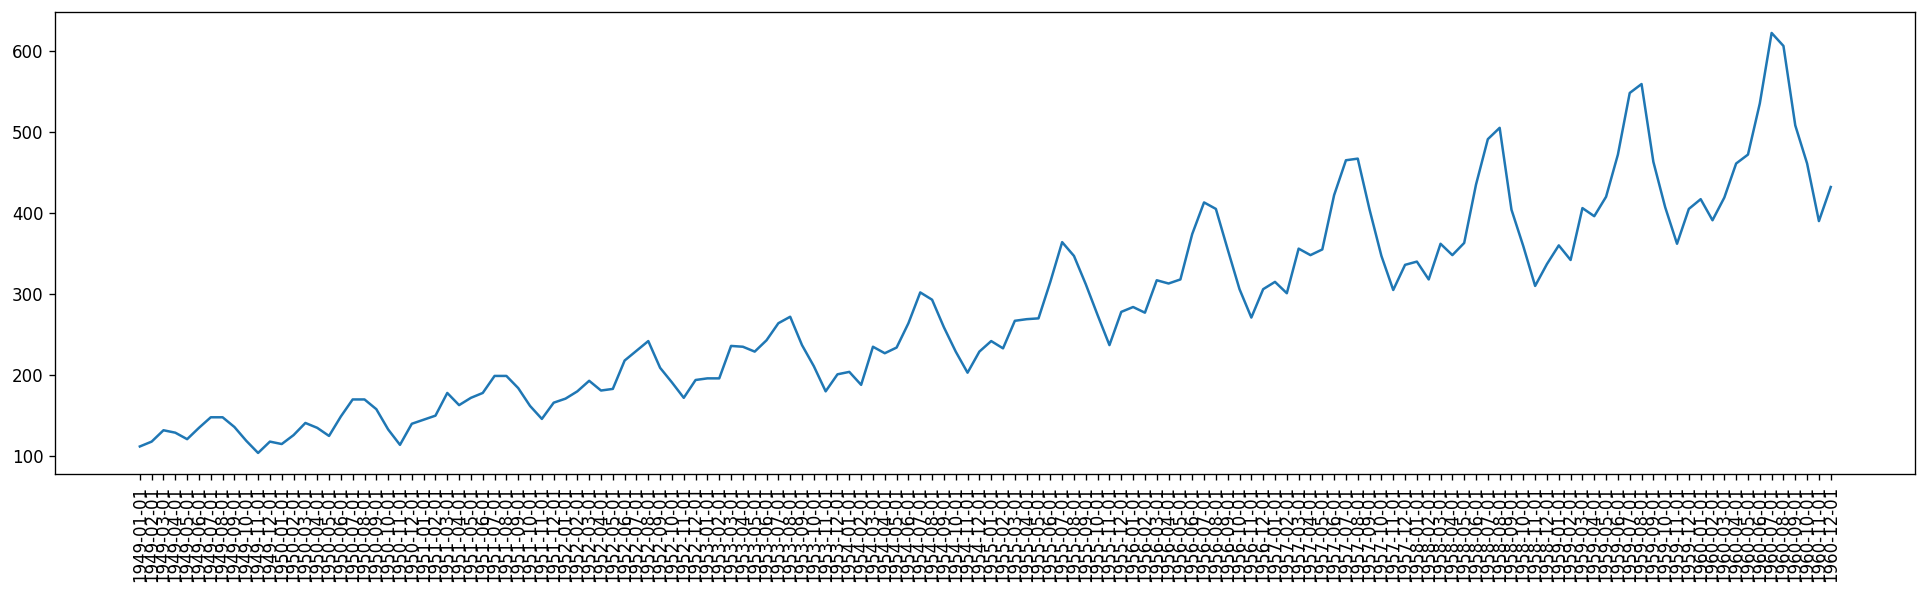

In [29]:
# plt.subplot(1,2,1)
plt.figure(figsize=(20,5),dpi=120)
plt.plot(data.date,data.value)
# plt.plot(task_df.month_id,task_df.new_mau)
# plt.gca().set(title="MAU Plot", xlabel="Month ID",ylabel="MAU")
plt.xticks(rotation=90)
plt.show()

In [30]:
data["value"].min()

104

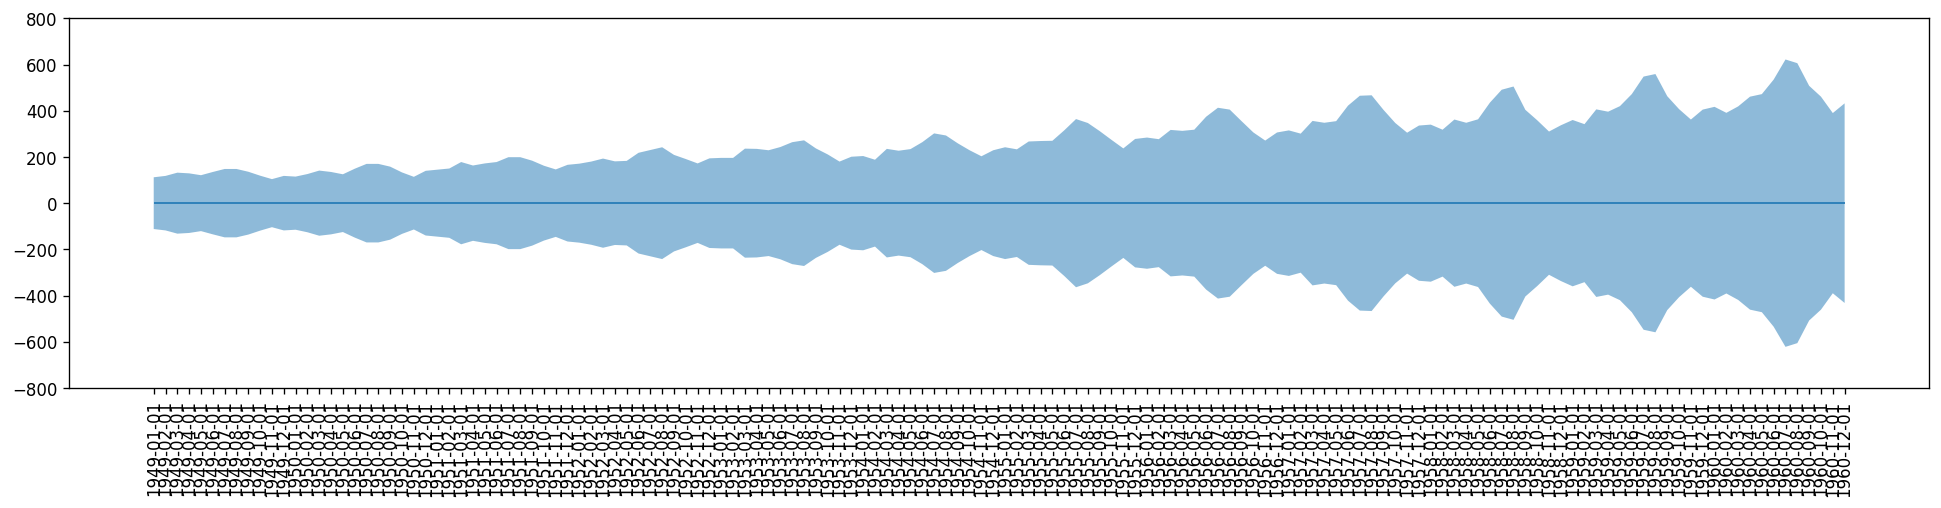

In [38]:
plt.figure(figsize=(20,4),dpi=120)
plt.fill_between(data.date,y1=data.value,y2=-(data.value),alpha=0.5,linewidth=2)
plt.ylim(-800,800)
plt.hlines(y=0,xmin=np.min(data.date),xmax=np.max(data.date),linewidth=1)
plt.xticks(rotation=90)
plt.show()

In [45]:
data['year'] = [d.year for d in data.date]
data['month'] = [d.strftime('%b') for d in data.date]

In [46]:
data.head()

,date,value,year,month
0,1949-01-01,112,1949,Jan
1,1949-02-01,118,1949,Feb
2,1949-03-01,132,1949,Mar
3,1949-04-01,129,1949,Apr
4,1949-05-01,121,1949,May


In [48]:
year = data.year.unique()
year

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

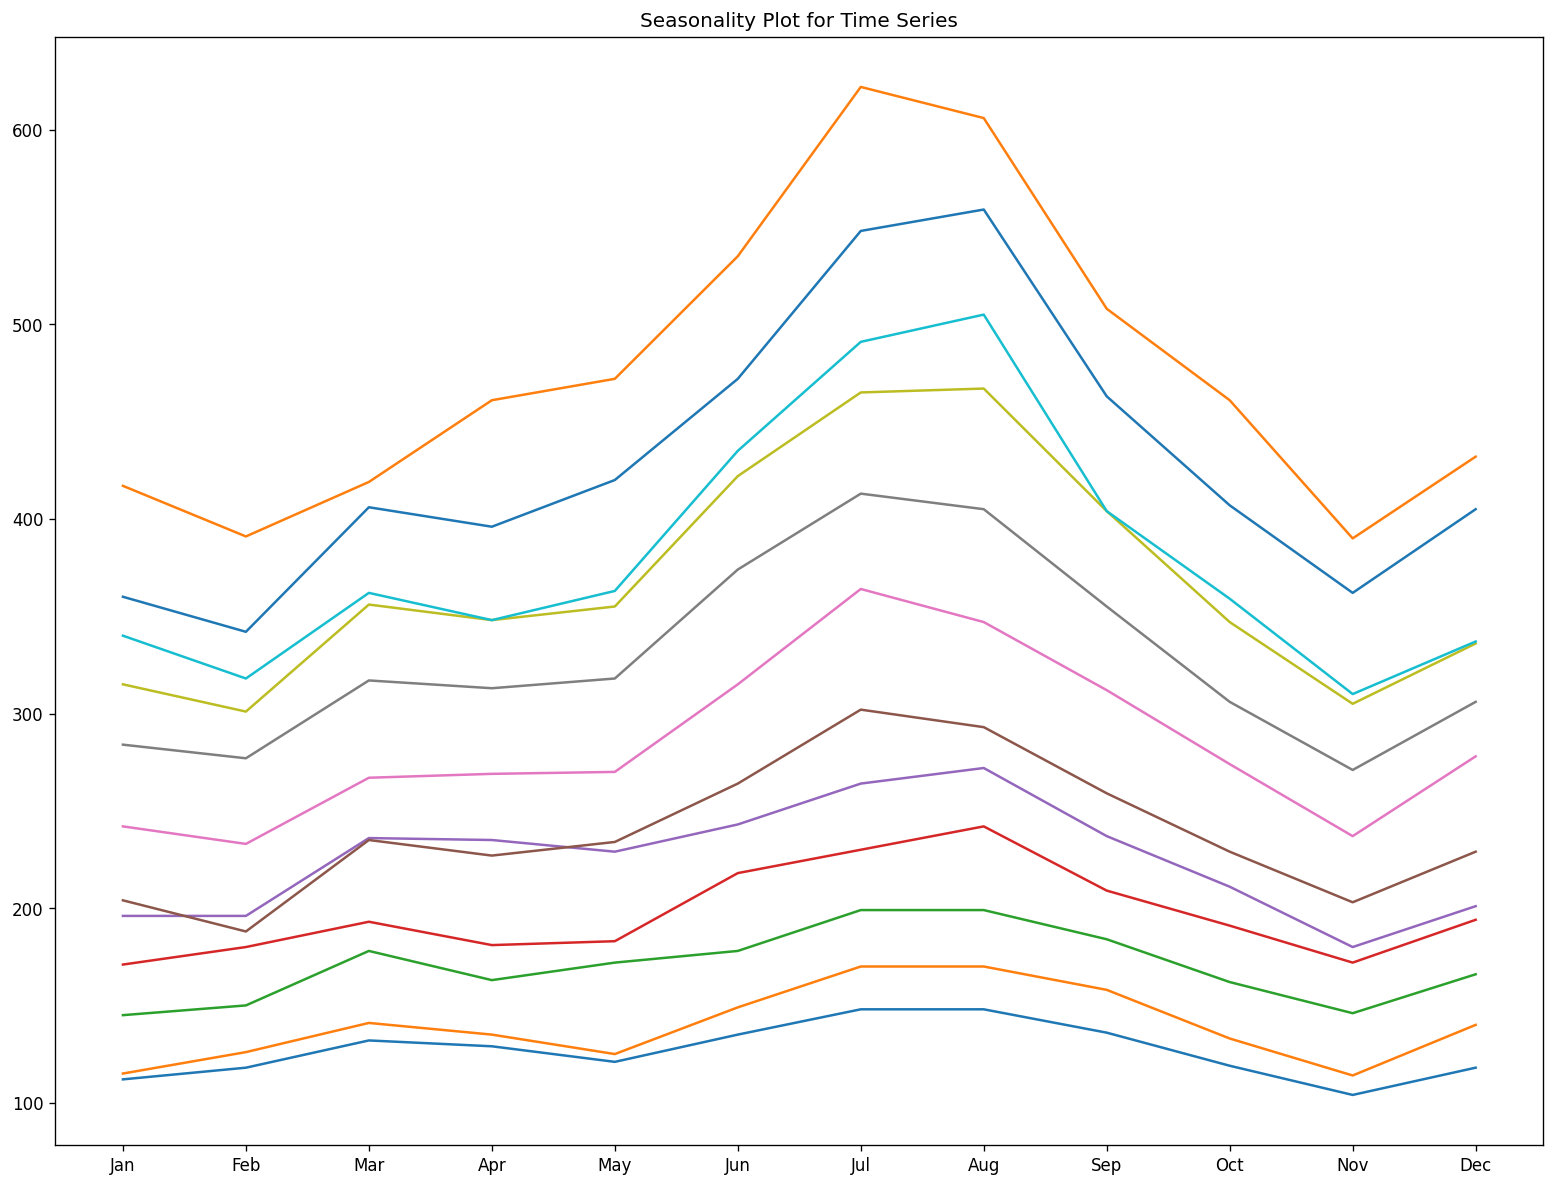

In [57]:
plt.figure(figsize=(16,12))

for i,y in enumerate(year):

    plt.plot('month','value',data=data.loc[data.year==y,:],label=y)

plt.title("Seasonality Plot for Time Series")
plt.show()


In [54]:
# data.loc[data.year==1949]